## Seven Days of Code - Day 3

### Data Cleaning

Day three of Seven Days of Code project
<p>More about the project <a href="https://7daysofcode.io/matricula/data-science">
here</a>.</p>

<p>Reference <a href="https://thecleverprogrammer.com/2021/09/08/apple-stock-price-prediction-with-machine-learning/">
here</a> and <a href="http://www.kasimte.com/2020/02/09/linear-regression-from-time-series-data-using-scikit-learn.html"> here</a></p>


<p>Data Source <a href="https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes" >here</a> </p>

### Goal: predict Brazilian Senators expenditure for the next three months

In [1]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime

import pandas as pd

import numpy as np

In [2]:
#Import the data

#ds == date of the reimbursement
#Y == sum of the reimbursements made in a certain date

data = pd.read_csv('dataset_ceaps_forecasting.csv')

In [3]:
data.head()

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32


In [4]:
data.tail()

,ds,y
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56
1460,2021-12-31,27219.41


#### Average of the last three months of data

In [5]:
#Take the year and the month from ds column
data['year'] = pd.DatetimeIndex(data['ds']).year
data['month'] = pd.DatetimeIndex(data['ds']).month

In [6]:
#Filtered DataFrame
data_2021 = data.query('year == 2021')
data_2021.head()

,ds,y,year,month
1096,2021-01-01,20971.94,2021,1
1097,2021-01-02,5863.44,2021,1
1098,2021-01-03,15293.99,2021,1
1099,2021-01-04,61860.13,2021,1
1100,2021-01-05,86977.14,2021,1


In [7]:
#Filter last three months
data_threemonths = data_2021.query('month in (10,11,12)')
data_threemonths

,ds,y,year,month
1369,2021-10-01,233702.29,2021,10
1370,2021-10-02,12978.01,2021,10
1371,2021-10-03,24074.49,2021,10
1372,2021-10-04,152114.12,2021,10
1373,2021-10-05,109587.07,2021,10
...,...,...,...,...
1456,2021-12-27,28552.41,2021,12
1457,2021-12-28,154547.27,2021,12
1458,2021-12-29,22495.76,2021,12
1459,2021-12-30,118345.56,2021,12


In [8]:
#Avg "y" for the last three months
print('The avg of reimbursements for the last three months is R$', round(data['y'].mean(),2))

The avg of reimbursements for the last three months is R$ 63876.04


## Prediction

In [9]:
#Make sure "ds" is datetime
data['ds'] = pd.to_datetime(data['ds'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
 2   year    1461 non-null   int64         
 3   month   1461 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 45.8 KB


In [10]:
!pip install autots

In [11]:
from autots import AutoTS

#### Check Outliers

In [12]:
data.describe()

,y,year,month
count,1461.000000,1461.000000,1461.000000
mean,63876.044497,2019.500342,6.522930
std,53285.501861,1.118111,3.449884
min,100.000000,2018.000000,1.000000
25%,19735.990000,2019.000000,4.000000
50%,53764.030000,2020.000000,7.000000
75%,91485.640000,2020.000000,10.000000
max,444152.910000,2021.000000,12.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


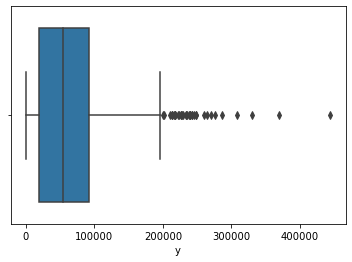

In [13]:
#First, it will be used a boxplot to visually detect the outliers

import seaborn as sns

# Boxplot
sns.boxplot(data['y']);

Values above 200000 are outliers

In [14]:
#Position of the outlier
print(np.where(data['y']>200000))

(array([  31,   58,   59,   91,  121,  212,  273,  304,  308,  336,  338,
        350,  518,  546,  638,  700,  702,  714,  791,  882,  945,  974,
       1004, 1037, 1065, 1066, 1085, 1155, 1218, 1247, 1277, 1309, 1311,
       1339, 1369, 1400, 1430], dtype=int64),)


Now, the outliers will be detected with more precision using Inter Quartile Range (IQR)

In [15]:
#IQR
Q1 = np.percentile(data['y'],25,interpolation = 'midpoint')
Q3 = np.percentile(data['y'],72,interpolation = 'midpoint')

IQR = Q3 - Q1

In [16]:
IQR

67092.05999999998

In [17]:
#Above upper bound
upper = np.where(data['y'] >= (Q3+ 1.5*IQR))

#Below lower bound
lower = np.where(data['y'] <= (Q3 - 1.5*IQR))

As AutoTS removes outliers automatically, they don't need to be removed

## Model

The library used to create this model is AutoTS, which was develop for automatic Time Series Forecasting

As explained by Aman Kharwal <a href = 'https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/' target= "_blank" >here</a>:

>AutoTS means Automatic Time Series, it is a machine learning library in Python used for the task of time series forecasting
>

In [18]:
#Model to forecast the next three months of expenditure
model = AutoTS(forecast_length=3, frequency = 'M', ensemble = 'simple')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
model = model.fit(data,date_col='ds',value_col='y',id_col=None)

Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 10: GLM
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model LastValueNaive in generation 0 of 10
Model Number: 15 with model LastValueNaive in generation 0 of 10
Model Number: 16 with model LastValueNaive in generation 0 of 10
Model Number: 17 with model LastValueNaive in generation 0 of 10
Model Number

Model Number: 89 with model ETS in generation 0 of 10
Model Number: 90 with model ConstantNaive in generation 0 of 10
Model Number: 91 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 91: MultivariateRegression
Model Number: 92 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 92: ARDL
Model Number: 93 with model NVAR in generation 0 of 10
Model Number: 94 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 94: SectionalMotif
Model Number: 95 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 95: UnivariateMotif
Model Number: 96 with model UnobservedCompon

C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 99 with model ConstantNaive in generation 0 of 10
Model Number: 100 with model NVAR in generation 0 of 10
Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 102: FBProphet
Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 105: FBProphet
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 106: FBProphet
Model Number: 107 with model MultivariateRegression in generation 0 of 10
Mod

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 123: SectionalMotif
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 124: MultivariateMotif
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 126: VAR
Model Number: 127 with model LastValueNaive in generation 0 of 10
Model Number: 128 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (33)') in model 128: UnivariateMotif
Model Number: 129 with

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 195 with model ConstantNaive in generation 1 of 10
Model Number: 196 with model ConstantNaive in generation 1 of 10
Model Number: 197 with model ConstantNaive in generation 1 of 10
Model Number: 198 with model SectionalMotif in generation 1 of 10
Model Number: 199 with model SectionalMotif in generation 1 of 10
Model Number: 200 with model SectionalMotif in generation 1 of 10
Model Number: 201 with model SectionalMotif in generation 1 of 10
Model Number: 202 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 202: GLM
Model Number: 203 with model GLM in generation 1 of 10
Model Number: 204 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 204: GLM
Model Number: 205 with model GLM in generation 1 of 10
Model Number: 206 with model NVAR in generation 1 of 10
Model Number: 207 with model NVAR in generation 1 of 10

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 210 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 210: VAR
Model Number: 211 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 211: VAR
Model Number: 212 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 212: VAR
Model Number: 213 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 213: VAR
Model Number: 214 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 214: VECM
Model Number: 215 with model VECM in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 215: VECM
Model Number: 216 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 216: VECM


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1444: RuntimeWarning: divide by zero encountered in true_divide
  endog * np.log(endog / mu) + (mu - endog))
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:798: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Ad

Model Number: 255 with model ETS in generation 2 of 10
Model Number: 256 with model ETS in generation 2 of 10
Model Number: 257 with model ETS in generation 2 of 10
Model Number: 258 with model GLS in generation 2 of 10
Model Number: 259 with model GLS in generation 2 of 10
Model Number: 260 with model GLS in generation 2 of 10
Model Number: 261 with model SeasonalNaive in generation 2 of 10
Model Number: 262 with model SeasonalNaive in generation 2 of 10
Model Number: 263 with model SeasonalNaive in generation 2 of 10
Model Number: 264 with model SeasonalNaive in generation 2 of 10
Model Number: 265 with model MultivariateMotif in generation 2 of 10
Model Number: 266 with model MultivariateMotif in generation 2 of 10
Model Number: 267 with model MultivariateMotif in generation 2 of 10
Model Number: 268 with model MultivariateMotif in generation 2 of 10
Model Number: 269 with model NVAR in generation 2 of 10
Model Number: 270 with model NVAR in generation 2 of 10
Model Number: 271 with

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 338: GLM
Model Number: 339 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 339: GLM
Model Number: 340 with model ETS in generation 3 of 10
Model Number: 341 with model ETS in generation 3 of 10
Model Number: 342 with model ETS in generation 3 of 10
Model Number: 343 with model ETS in generation 3 of 10
Model Number: 344 with model GLS in generation 3 of 10


C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 345 with model GLS in generation 3 of 10
Model Number: 346 with model GLS in generation 3 of 10
Model Number: 347 with model WindowRegression in generation 3 of 10
Model Number: 348 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 348: WindowRegression
Model Number: 349 with model WindowRegression in generation 3 of 10
Model Number: 350 with model SectionalMotif in generation 3 of 10
Model Number: 351 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 351: SectionalMotif
Model Number: 352 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 352: SectionalMotif
Model Number: 353 with model SectionalMotif in generation 3 of 10
Model Number: 354 with model

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:517: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1198: RuntimeWarning: invalid value encounter

Model Number: 415 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 415: GLM
Model Number: 416 with model ETS in generation 4 of 10
Model Number: 417 with model ETS in generation 4 of 10
Model Number: 418 with model ETS in generation 4 of 10
Model Number: 419 with model ETS in generation 4 of 10
Model Number: 420 with model WindowRegression in generation 4 of 10
Model Number: 421 with model WindowRegression in generation 4 of 10
Model Number: 422 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 422: WindowRegression
Model Number: 423 with model SectionalMotif in generation 4 of 10
Model Number: 424 with model SectionalMotif in generation 4 of 10
Model Number: 425 with model SectionalMotif in generation 4 of 10
Model Number: 426 with model SectionalMotif in generation 4 of 10
Model Number: 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._cle

Model Number: 489 with model GLS in generation 5 of 10
Model Number: 490 with model WindowRegression in generation 5 of 10
Model Number: 491 with model WindowRegression in generation 5 of 10
Model Number: 492 with model WindowRegression in generation 5 of 10
Model Number: 493 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (10)') in model 493: SectionalMotif
Model Number: 494 with model SectionalMotif in generation 5 of 10
Model Number: 495 with model SectionalMotif in generation 5 of 10
Model Number: 496 with model SectionalMotif in generation 5 of 10
Model Number: 497 with model VAR in generation 5 of 10
Template Eval Error: KeyError('aic') in model 497: VAR
Model Number: 498 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 498: VAR
Model Number: 499 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 499: VAR

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 566: WindowRegression
Model Number: 567 with model WindowRegression in generation 6 of 10
Model Number: 568 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 568: VAR
Model Number: 569 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 569: VAR
Model Number: 570 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 570: VAR
Model Number: 571 with model VAR in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 571: VAR
Model Number: 572 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 572: VECM
Model Number: 573 with model VECM in generation 6 of 10
Template Eval Error: ValueError('Only gave one variable to VECM

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 625 with model MultivariateRegression in generation 7 of 10
Model Number: 626 with model MultivariateRegression in generation 7 of 10
Model Number: 627 with model MultivariateRegression in generation 7 of 10
Model Number: 628 with model SeasonalNaive in generation 7 of 10
Model Number: 629 with model SeasonalNaive in generation 7 of 10
Model Number: 630 with model SeasonalNaive in generation 7 of 10
Template Eval Error: KeyError(Timestamp('2018-01-31 00:00:00', freq='M')) in model 630: SeasonalNaive
Model Number: 631 with model SeasonalNaive in generation 7 of 10
Model Number: 632 with model GLS in generation 7 of 10
Model Number: 633 with model GLS in generation 7 of 10


C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 634 with model GLS in generation 7 of 10
Model Number: 635 with model WindowRegression in generation 7 of 10
Model Number: 636 with model WindowRegression in generation 7 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 636: WindowRegression
Model Number: 637 with model WindowRegression in generation 7 of 10
Model Number: 638 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 638: VAR
Model Number: 639 with model VAR in generation 7 of 10
Template Eval Error: IndexError('tuple index out of range') in model 639: VAR
Model Number: 640 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 640: VAR
Model Number: 641 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 641: VAR
Model Number: 642 with model VECM in generation 7 of 10
Template Eval Error: ValueError("reg

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:2441: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28138283.83655128, tolerance: 465957.24745298666
  ) = cd_fast.enet_coordinate_descent_multi_task(


Model Number: 709 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 709: VAR
Model Number: 710 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 710: VAR
Model Number: 711 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 711: VAR
Model Number: 712 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 712: VECM
Model Number: 713 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 713: VECM
Model Number: 714 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 714: VECM
Model Number: 715 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 715: VECM
Model Number: 716 with

C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 761 with model MultivariateRegression in generation 9 of 10
Model Number: 762 with model MultivariateRegression in generation 9 of 10
Model Number: 763 with model MultivariateRegression in generation 9 of 10
Model Number: 764 with model WindowRegression in generation 9 of 10
Model Number: 765 with model WindowRegression in generation 9 of 10
Model Number: 766 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 766: WindowRegression
Model Number: 767 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 767: GLM
Model Number: 768 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:428: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:134: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 773 with model SeasonalNaive in generation 9 of 10
Model Number: 774 with model SeasonalNaive in generation 9 of 10
Model Number: 775 with model GLS in generation 9 of 10
Model Number: 776 with model GLS in generation 9 of 10
Model Number: 777 with model VAR in generation 9 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 777: VAR
Model Number: 778 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 778: VAR
Model Number: 779 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 779: VAR
Model Number: 780 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 780: VAR
Model Number: 781 with model VECM in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 781: VECM
Model Number: 782 with model VECM in generation 9 of

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 787 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 787: FBProphet
Model Number: 788 with model FBProphet in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 788: FBProphet
Model Number: 789 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 789: ARDL
Model Number: 790 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 790: ARDL
Model Number: 791 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\statsmodels\\

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 820 with model SectionalMotif in generation 10 of 10
Model Number: 821 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 821: SectionalMotif
Model Number: 822 with model SectionalMotif in generation 10 of 10
Model Number: 823 with model SectionalMotif in generation 10 of 10
Model Number: 824 with model LastValueNaive in generation 10 of 10
Model Number: 825 with model LastValueNaive in generation 10 of 10
Model Number: 826 with model Theta in generation 10 of 10


C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 827 with model Theta in generation 10 of 10
Model Number: 828 with model Theta in generation 10 of 10
Model Number: 829 with model Theta in generation 10 of 10
Model Number: 830 with model MultivariateRegression in generation 10 of 10
Model Number: 831 with model MultivariateRegression in generation 10 of 10
Model Number: 832 with model MultivariateRegression in generation 10 of 10
Model Number: 833 with model MultivariateRegression in generation 10 of 10
Model Number: 834 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 834: WindowRegression
Model Number: 835 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 835: WindowRegression
Model Number: 836 with model WindowRegression in generation 10 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 837 with model GLM in generation 10 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 837: GLM
Model Number: 838 with model GLM in generation 10 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 838: GLM
Model Number: 839 with model GLM in generation 10 of 10
Model Number: 840 with model GLM in generation 10 of 10


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 841 with model SeasonalNaive in generation 10 of 10
Model Number: 842 with model SeasonalNaive in generation 10 of 10
Model Number: 843 with model SeasonalNaive in generation 10 of 10
Model Number: 844 with model SeasonalNaive in generation 10 of 10
Model Number: 845 with model GLS in generation 10 of 10
Model Number: 846 with model GLS in generation 10 of 10
Model Number: 847 with model GLS in generation 10 of 10
Model Number: 848 with model Ensemble in generation 11 of Ensembles
Model Number: 849 with model Ensemble in generation 11 of Ensembles
Model Number: 850 with model Ensemble in generation 11 of Ensembles
Model Number: 851 with model Ensemble in generation 11 of Ensembles
Model Number: 852 with model Ensemble in generation 11 of Ensembles
Model Number: 853 with model Ensemble in generation 11 of Ensembles
Model Number: 854 with model Ensemble in generation 11 of Ensembles
Model Number: 855 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Mode

67 - Theta with avg smape 53.42: 
Model Number: 68 of 128 with model ETS for Validation 1
68 - ETS with avg smape 70.41: 
Model Number: 69 of 128 with model ETS for Validation 1
69 - ETS with avg smape 70.41: 
Model Number: 70 of 128 with model GLM for Validation 1
70 - GLM with avg smape 62.13: 
Model Number: 71 of 128 with model GLM for Validation 1


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


71 - GLM with avg smape 62.13: 
Model Number: 72 of 128 with model GLM for Validation 1
72 - GLM with avg smape 62.13: 
Model Number: 73 of 128 with model GLM for Validation 1
73 - GLM with avg smape 62.07: 
Model Number: 74 of 128 with model LastValueNaive for Validation 1


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


74 - LastValueNaive with avg smape 52.82: 
Model Number: 75 of 128 with model ConstantNaive for Validation 1
75 - ConstantNaive with avg smape 53.65: 
Model Number: 76 of 128 with model WindowRegression for Validation 1
76 - WindowRegression with avg smape 67.82: 
Model Number: 77 of 128 with model LastValueNaive for Validation 1
77 - LastValueNaive with avg smape 53.78: 
Model Number: 78 of 128 with model LastValueNaive for Validation 1
78 - LastValueNaive with avg smape 62.57: 
Model Number: 79 of 128 with model GLS for Validation 1
79 - GLS with avg smape 53.93: 
Model Number: 80 of 128 with model GLS for Validation 1
80 - GLS with avg smape 53.93: 
Model Number: 81 of 128 with model GLS for Validation 1
81 - GLS with avg smape 53.93: 
Model Number: 82 of 128 with model MultivariateRegression for Validation 1
82 - MultivariateRegression with avg smape 49.48: 
Model Number: 83 of 128 with model ConstantNaive for Validation 1
83 - ConstantNaive with avg smape 62.99: 
Model Number: 84 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


103 - SeasonalNaive with avg smape 48.17: 
Model Number: 104 of 128 with model UnobservedComponents for Validation 1
104 - UnobservedComponents with avg smape 66.03: 
Model Number: 105 of 128 with model DatepartRegression for Validation 1
105 - DatepartRegression with avg smape 44.41: 
Model Number: 106 of 128 with model GLS for Validation 1
106 - GLS with avg smape 52.48: 
Model Number: 107 of 128 with model GLM for Validation 1
107 - GLM with avg smape 62.23: 
Model Number: 108 of 128 with model DatepartRegression for Validation 1
108 - DatepartRegression with avg smape 60.04: 
Model Number: 109 of 128 with model SectionalMotif for Validation 1
109 - SectionalMotif with avg smape 56.38: 
Model Number: 110 of 128 with model UnobservedComponents for Validation 1
110 - UnobservedComponents with avg smape 38.22: 
Model Number: 111 of 128 with model MultivariateRegression for Validation 1
111 - MultivariateRegression with avg smape 53.95: 
Model Number: 112 of 128 with model SeasonalNaive

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


119 - DatepartRegression with avg smape 76.53: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 1
120 - UnobservedComponents with avg smape 52.24: 
Model Number: 121 of 128 with model WindowRegression for Validation 1
121 - WindowRegression with avg smape 69.52: 
Model Number: 122 of 128 with model SectionalMotif for Validation 1
122 - SectionalMotif with avg smape 51.35: 
Model Number: 123 of 128 with model WindowRegression for Validation 1
123 - WindowRegression with avg smape 47.87: 
Model Number: 124 of 128 with model WindowRegression for Validation 1
124 - WindowRegression with avg smape 48.97: 
Model Number: 125 of 128 with model WindowRegression for Validation 1
125 - WindowRegression with avg smape 47.35: 
Model Number: 126 of 128 with model WindowRegression for Validation 1
126 - WindowRegression with avg smape 50.07: 
Model Number: 127 of 128 with model DatepartRegression for Validation 1
127 - DatepartRegression with avg smape 69.17: 
Model Number: 12

66 - Theta with avg smape 67.28: 
Model Number: 67 of 128 with model Theta for Validation 2
67 - Theta with avg smape 67.28: 
Model Number: 68 of 128 with model ETS for Validation 2
68 - ETS with avg smape 67.65: 
Model Number: 69 of 128 with model ETS for Validation 2
69 - ETS with avg smape 67.65: 
Model Number: 70 of 128 with model GLM for Validation 2
70 - GLM with avg smape 68.99: 
Model Number: 71 of 128 with model GLM for Validation 2


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\

71 - GLM with avg smape 68.99: 
Model Number: 72 of 128 with model GLM for Validation 2
72 - GLM with avg smape 68.99: 
Model Number: 73 of 128 with model GLM for Validation 2
73 - GLM with avg smape 68.99: 
Model Number: 74 of 128 with model LastValueNaive for Validation 2
74 - LastValueNaive with avg smape 54.51: 
Model Number: 75 of 128 with model ConstantNaive for Validation 2
75 - ConstantNaive with avg smape 69.01: 
Model Number: 76 of 128 with model WindowRegression for Validation 2


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


76 - WindowRegression with avg smape 72.87: 
Model Number: 77 of 128 with model LastValueNaive for Validation 2
77 - LastValueNaive with avg smape 68.99: 
Model Number: 78 of 128 with model LastValueNaive for Validation 2
78 - LastValueNaive with avg smape 59.45: 
Model Number: 79 of 128 with model GLS for Validation 2
79 - GLS with avg smape 69.65: 
Model Number: 80 of 128 with model GLS for Validation 2
80 - GLS with avg smape 69.65: 
Model Number: 81 of 128 with model GLS for Validation 2
81 - GLS with avg smape 69.65: 
Model Number: 82 of 128 with model MultivariateRegression for Validation 2
82 - MultivariateRegression with avg smape 64.02: 
Model Number: 83 of 128 with model ConstantNaive for Validation 2
83 - ConstantNaive with avg smape 74.05: 
Model Number: 84 of 128 with model Theta for Validation 2
84 - Theta with avg smape 67.15: 
Model Number: 85 of 128 with model Theta for Validation 2
85 - Theta with avg smape 67.15: 
Model Number: 86 of 128 with model SeasonalNaive for 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 103 of 128 with model SeasonalNaive for Validation 2
📈 103 - SeasonalNaive with avg smape 28.78: 
Model Number: 104 of 128 with model UnobservedComponents for Validation 2
104 - UnobservedComponents with avg smape 98.85: 
Model Number: 105 of 128 with model DatepartRegression for Validation 2
105 - DatepartRegression with avg smape 51.41: 
Model Number: 106 of 128 with model GLS for Validation 2
106 - GLS with avg smape 57.0: 
Model Number: 107 of 128 with model GLM for Validation 2
107 - GLM with avg smape 72.57: 
Model Number: 108 of 128 with model DatepartRegression for Validation 2
108 - DatepartRegression with avg smape 70.45: 
Model Number: 109 of 128 with model SectionalMotif for Validation 2
109 - SectionalMotif with avg smape 30.92: 
Model Number: 110 of 128 with model UnobservedComponents for Validation 2
110 - UnobservedComponents with avg smape 58.33: 
Model Number: 111 of 128 with model MultivariateRegression for Validation 2
📈 111 - MultivariateRegression wi

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


119 - DatepartRegression with avg smape 53.46: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 2
120 - UnobservedComponents with avg smape 61.66: 
Model Number: 121 of 128 with model WindowRegression for Validation 2
121 - WindowRegression with avg smape 45.57: 
Model Number: 122 of 128 with model SectionalMotif for Validation 2
122 - SectionalMotif with avg smape 67.72: 
Model Number: 123 of 128 with model WindowRegression for Validation 2
123 - WindowRegression with avg smape 64.55: 
Model Number: 124 of 128 with model WindowRegression for Validation 2
124 - WindowRegression with avg smape 63.83: 
Model Number: 125 of 128 with model WindowRegression for Validation 2
125 - WindowRegression with avg smape 63.77: 
Model Number: 126 of 128 with model WindowRegression for Validation 2
126 - WindowRegression with avg smape 65.02: 
Model Number: 127 of 128 with model DatepartRegression for Validation 2
127 - DatepartRegression with avg smape 56.93: 
Model Number: 12

Model Number: 66 of 128 with model Theta for Validation 3
66 - Theta with avg smape 76.66: 
Model Number: 67 of 128 with model Theta for Validation 3
67 - Theta with avg smape 76.66: 
Model Number: 68 of 128 with model ETS for Validation 3
68 - ETS with avg smape 69.24: 
Model Number: 69 of 128 with model ETS for Validation 3
69 - ETS with avg smape 69.24: 
Model Number: 70 of 128 with model GLM for Validation 3
70 - GLM with avg smape 69.51: 
Model Number: 71 of 128 with model GLM for Validation 3


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


71 - GLM with avg smape 69.51: 
Model Number: 72 of 128 with model GLM for Validation 3
72 - GLM with avg smape 69.51: 
Model Number: 73 of 128 with model GLM for Validation 3


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1227: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1231: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


73 - GLM with avg smape 69.51: 
Model Number: 74 of 128 with model LastValueNaive for Validation 3
74 - LastValueNaive with avg smape 54.88: 
Model Number: 75 of 128 with model ConstantNaive for Validation 3
75 - ConstantNaive with avg smape 72.23: 
Model Number: 76 of 128 with model WindowRegression for Validation 3
76 - WindowRegression with avg smape 64.93: 
Model Number: 77 of 128 with model LastValueNaive for Validation 3
77 - LastValueNaive with avg smape 72.21: 
Model Number: 78 of 128 with model LastValueNaive for Validation 3
78 - LastValueNaive with avg smape 86.11: 
Model Number: 79 of 128 with model GLS for Validation 3
79 - GLS with avg smape 78.46: 
Model Number: 80 of 128 with model GLS for Validation 3
80 - GLS with avg smape 78.46: 
Model Number: 81 of 128 with model GLS for Validation 3
81 - GLS with avg smape 78.46: 
Model Number: 82 of 128 with model MultivariateRegression for Validation 3
82 - MultivariateRegression with avg smape 74.23: 
Model Number: 83 of 128 wi

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


102 - GLS with avg smape 68.16: 
Model Number: 103 of 128 with model SeasonalNaive for Validation 3
103 - SeasonalNaive with avg smape 36.4: 
Model Number: 104 of 128 with model UnobservedComponents for Validation 3
Template Eval Error: LinAlgError('LU decomposition error.') in model 104: UnobservedComponents
Model Number: 105 of 128 with model DatepartRegression for Validation 3
105 - DatepartRegression with avg smape 55.58: 
Model Number: 106 of 128 with model GLS for Validation 3
106 - GLS with avg smape 68.15: 
Model Number: 107 of 128 with model GLM for Validation 3
107 - GLM with avg smape 76.79: 
Model Number: 108 of 128 with model DatepartRegression for Validation 3
108 - DatepartRegression with avg smape 74.47: 
Model Number: 109 of 128 with model SectionalMotif for Validation 3
109 - SectionalMotif with avg smape 61.61: 
Model Number: 110 of 128 with model UnobservedComponents for Validation 3
110 - UnobservedComponents with avg smape 68.63: 
Model Number: 111 of 128 with mod

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


118 - UnobservedComponents with avg smape 73.45: 
Model Number: 119 of 128 with model DatepartRegression for Validation 3
119 - DatepartRegression with avg smape 72.61: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 3
120 - UnobservedComponents with avg smape 73.83: 
Model Number: 121 of 128 with model WindowRegression for Validation 3
121 - WindowRegression with avg smape 98.3: 
Model Number: 122 of 128 with model SectionalMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (10)') in model 122: SectionalMotif
Model Number: 123 of 128 with model WindowRegression for Validation 3
123 - WindowRegression with avg smape 74.5: 
Model Number: 124 of 128 with model WindowRegression for Validation 3
124 - WindowRegression with avg smape 74.02: 
Model Number: 125 of 128 with model WindowRegression for Validation 3
125 - WindowRegression with avg smape 71.96: 
Model Number: 126 of 128 with model WindowRegression for Validation 3
126 - WindowRe

In [20]:
prediction = model.predict()

In [21]:
forecast = prediction.forecast

In [22]:
#Forecast
print(forecast.round(2))

                    y
2022-01-31   38318.82
2022-02-28  323491.95
2022-03-31  351957.14
